In [3]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable
import pickle 
from ply import write_ply

from scipy.special import sph_harm

from utilities import *
from VoxelGrid import *
import os


from skimage.metrics import peak_signal_noise_ratio

os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
device='cuda' if torch.cuda.is_available() else 'cpu'

N_points=200

In [15]:
dataset  = "chair"
test_focal, test_c2w, test_gt = get_data("../nerf_synthetic/"+dataset, "test")

LOAD DATA ../nerf_synthetic/chair/test


100%|█████████████████████████████████████████| 200/200 [00:03<00:00, 50.92it/s]


In [16]:
red = 8
disp_ims_test, disp_rays_test = reduce_data(test_c2w, test_gt,test_focal, red)
disp_im_w = disp_ims_test[0].shape[0]

In [42]:
VG = VoxelGrid()
VG.load('../saved_grids_carve_large/ficus_carve.obj')
#VG.load(dataset+"_carve.obj")
#VG.save_pointcloud()

UnpicklingError: pickle data was truncated

In [31]:
compute_psnr(VG, disp_rays_test, disp_ims_test, 1800)

100%|█████████████████████████████████████████| 200/200 [00:16<00:00, 11.95it/s]


24.83744195717921

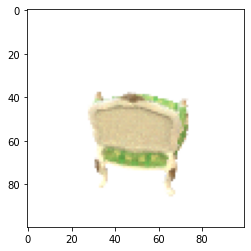

In [25]:
im1 = VG.render_large_image_from_rays(disp_rays_test[2], (1800, 1.2), 500)
plt.imshow(im1)

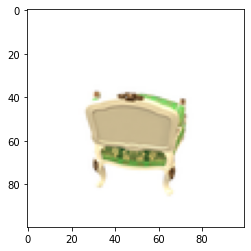

In [15]:
plt.imshow(disp_ims_test[2])

In [34]:
def rolling_average2(p, k=100):
    p2 = np.zeros((p.shape[0]-k))
    for i in range(p.shape[0]-k):
        p2[i] = p[i:i+k].sum()/k
    return p2

def rolling_average(p, k=100):
    p2 = np.zeros((p.shape[0]-k))
    for i in range(k):
        p2 += p[i:-(k-i)]
    return p2/k


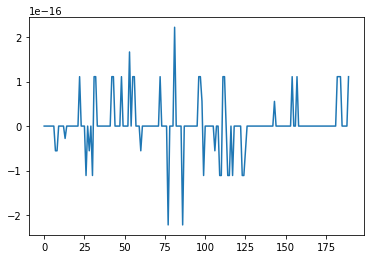

In [37]:
m = np.random.random(200)
plt.plot(rolling_average(m,10)-rolling_average2(m,10))


In [58]:
directories = [e for e in os.listdir("../nerf_synthetic") if os.path.isdir("../nerf_synthetic/"+e)]

for nerf_dir in directories:
    VG = VoxelGrid()
    VG.load(nerf_dir+".obj")
    test_focal, test_c2w, test_gt = get_data("../nerf_synthetic/"+nerf_dir, "test")
    red = 8
    disp_ims_test, disp_rays_test = reduce_data(test_c2w, test_gt,test_focal, red)
    disp_im_w = disp_ims_test[0].shape[0]
    print(nerf_dir, compute_psnr(VG, disp_rays_test, disp_ims_test))

In [3]:
directories = [e for e in os.listdir("../nerf_synthetic") if os.path.isdir("../nerf_synthetic/"+e)]



In [4]:
directories

['materials', 'drums', 'chair', 'mic', 'hotdog', 'lego', 'ficus', 'ship']

In [34]:
L=""
for d in directories:
    L+= "python psnr.py -grid ../saved_grids_carve_large/" +  d + "_carve -dataset ../nerf_synthetic/" +d+"/  >> out2.txt ;"

In [35]:
L

'python psnr.py -grid ../saved_grids_carve_large/materials_carve -dataset ../nerf_synthetic/materials/  >> out2.txt ;python psnr.py -grid ../saved_grids_carve_large/drums_carve -dataset ../nerf_synthetic/drums/  >> out2.txt ;python psnr.py -grid ../saved_grids_carve_large/chair_carve -dataset ../nerf_synthetic/chair/  >> out2.txt ;python psnr.py -grid ../saved_grids_carve_large/mic_carve -dataset ../nerf_synthetic/mic/  >> out2.txt ;python psnr.py -grid ../saved_grids_carve_large/hotdog_carve -dataset ../nerf_synthetic/hotdog/  >> out2.txt ;python psnr.py -grid ../saved_grids_carve_large/lego_carve -dataset ../nerf_synthetic/lego/  >> out2.txt ;python psnr.py -grid ../saved_grids_carve_large/ficus_carve -dataset ../nerf_synthetic/ficus/  >> out2.txt ;python psnr.py -grid ../saved_grids_carve_large/ship_carve -dataset ../nerf_synthetic/ship/  >> out2.txt ;'

In [6]:
L="""materials 20.983658414644378
drums 20.11704011990855
chair 23.68863742293628
mic 22.3209970604684
hotdog 23.790268967226112
lego 21.431574380612346
ficus 23.867144054158235
ship 20.65400208010486
""".split()[1::2]

In [9]:
np.array(L).astype(float).mean()

22.106665312507396

In [9]:
L=""
for d in directories:
    L+= "python main_carve2.py -model " +d+"/  >> out.txt ;"
L

'python main_carve2.py -model materials/  >> out.txt ;python main_carve2.py -model drums/  >> out.txt ;python main_carve2.py -model chair/  >> out.txt ;python main_carve2.py -model mic/  >> out.txt ;python main_carve2.py -model hotdog/  >> out.txt ;python main_carve2.py -model lego/  >> out.txt ;python main_carve2.py -model ficus/  >> out.txt ;python main_carve2.py -model ship/  >> out.txt ;'

In [22]:
L=""
for d in directories:
    L+= "python main.py -dataset ../nerf_synthetic/"+d+"/ > out.txt ; "
L



'python main.py -dataset ../nerf_synthetic/materials/ > out.txt ; python main.py -dataset ../nerf_synthetic/drums/ > out.txt ; python main.py -dataset ../nerf_synthetic/chair/ > out.txt ; python main.py -dataset ../nerf_synthetic/mic/ > out.txt ; python main.py -dataset ../nerf_synthetic/hotdog/ > out.txt ; python main.py -dataset ../nerf_synthetic/lego/ > out.txt ; python main.py -dataset ../nerf_synthetic/ficus/ > out.txt ; python main.py -dataset ../nerf_synthetic/ship/ > out.txt ; '

In [27]:
"../nerf_synthetic/lego"[18:]

'lego'